In [1]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [2]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
lending_df = pd.read_csv("./Resources/lending_data.csv")

# Review the DataFrame
lending_df.head(5)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [4]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = lending_df['loan_status']

# Separate the X variable, the features
X = lending_df.drop(columns='loan_status')

In [5]:
# Review the y variable Series
y

0        0
1        0
2        0
3        0
4        0
        ..
77531    1
77532    1
77533    1
77534    1
77535    1
Name: loan_status, Length: 77536, dtype: int64

In [6]:
# Review the X variable DataFrame
X

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
...,...,...,...,...,...,...,...
77531,19100.0,11.261,86600,0.653580,12,2,56600
77532,17700.0,10.662,80900,0.629172,11,2,50900
77533,17600.0,10.595,80300,0.626401,11,2,50300
77534,16300.0,10.068,75300,0.601594,10,2,45300


### Step 3: Check the balance of the labels variable (`y`) by using the `value_counts` function.

In [7]:
# Check the balance of our target valu
y.value_counts()

0    75036
1     2500
Name: loan_status, dtype: int64

### Step 4: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_model.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
logistic_model.score(X_test, y_test)

0.9918489475856377

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Print the balanced_accuracy score of the model
results = pd.DataFrame({
    'observd' : y_test,
    'estimated' : logistic_model.predict(X_test)
})
results['compare'] = results['observd'] == results['estimated']
results.groupby(['estimated','observd']).count()

compare
estimated observd         
0         0          18663
          1             56
1         0            102
          1            563

<Axes: >

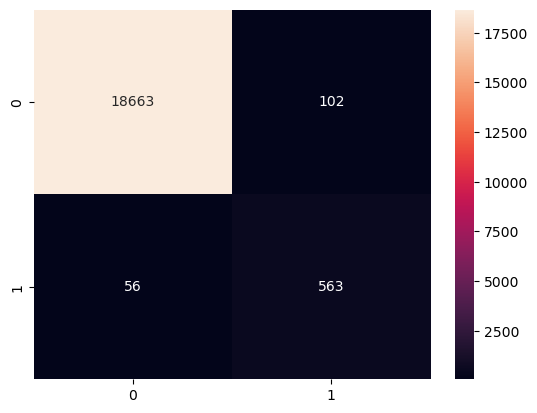

In [13]:
# Generate a confusion matrix for the model
import seaborn as sns
cnf= confusion_matrix(y_test, logistic_model.predict(X_test))
sns.heatmap(cnf,annot=True,fmt='.0f')

In [14]:
# Print the classification report for the model
print(classification_report(y_test,logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.85      0.91      0.88       619

    accuracy                           0.99     19384
   macro avg       0.92      0.95      0.94     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** the model accuracy is almost perfect with a .99 as we can see the precision of the model for the healthy loans if a perfect 1 but the high-risk loan has a low precision score, that might be because the data is unbalanced. In the classification report we see that only 619 people were classifyed as high-risk and 18765 have a healthy loan. but overall I think that the model works for predicting a healthy loan.

---

## Predict a Logistic Regression Model with Resampled Training Data

### Step 1: Use the `RandomOverSampler` module from the imbalanced-learn library to resample the data. Be sure to confirm that the labels have an equal number of data points. 

In [15]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(random_state=1)

# Fit the original training data to the random_oversampler model
X_res, y_res = ros.fit_resample(X, y)

In [18]:
# Count the distinct values of the resampled labels data
y_res.value_counts()

0    75036
1    75036
Name: loan_status, dtype: int64

### Step 2: Use the `LogisticRegression` classifier and the resampled data to fit the model and make predictions.

In [19]:
# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_model = LogisticRegression(random_state=1)

# Fit the model using the resampled training data
logistic_model.fit(X_res, y_res)

# Make a prediction using the testing data
logistic_model.score(X_test, y_test)

0.9938093272802311

### Step 3: Evaluate the model’s performance by doing the following:

* Calculate the accuracy score of the model.

* Generate a confusion matrix.

* Print the classification report.

In [20]:
# Print the balanced_accuracy score of the model 
results = pd.DataFrame({
    'observd' : y_test,
    'estimated' : logistic_model.predict(X_test)
})
results['compare'] = results['observd'] == results['estimated']
results.groupby(['estimated','observd']).count()

compare
estimated observd         
0         0          18649
          1              4
1         0            116
          1            615

<Axes: >

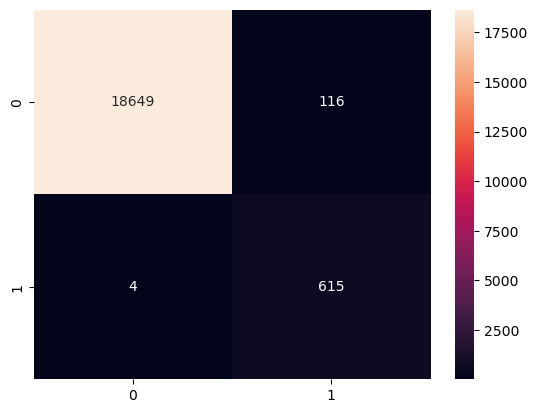

In [21]:
# Generate a confusion matrix for the model
cnf = confusion_matrix(y_test, logistic_model.predict(X_test))
sns.heatmap(cnf, annot=True, fmt='.0f')

In [22]:
# Print the classification report for the model
print(classification_report(y_test, logistic_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.99      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question

**Question:** How well does the logistic regression model, fit with oversampled data, predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** the model accuracy is almost perfect with a .99 same as the firt model, but we can see in this model that the recall percentages are better and that means a better overall performance. 